### Step 1: Load the Data and Perform Label Encoding

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv('updated_diabetic_data.csv')
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,readmitted
0,Caucasian,Female,15,1,1,7,3,59,0,18,...,9,no data,no data,No,No,No,No,No,Up,0
1,AfricanAmerican,Female,25,1,1,7,2,11,5,13,...,6,no data,no data,No,Steady,No,No,No,No,0
2,Caucasian,Male,35,1,1,7,2,44,1,16,...,7,no data,no data,No,No,No,No,No,Up,0
3,Caucasian,Male,45,1,1,7,1,51,0,8,...,5,no data,no data,No,Steady,No,No,No,Steady,0
4,Caucasian,Male,55,2,1,2,3,31,6,16,...,9,no data,no data,No,No,No,No,No,Steady,0


In [2]:
# Perform Label Encoding for categorical features
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

In [3]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['readmitted'])
y = data['readmitted']

In [4]:
# Feature Selection
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Selected Features:
gender
admission_type_id
discharge_disposition_id
time_in_hospital
num_procedures
num_medications
number_emergency
number_inpatient
number_diagnoses
max_glu_serum
A1Cresult
metformin
glipizide
glyburide
pioglitazone


In [5]:
# Train Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
# Print Accuracy Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("\nAccuracy Report:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


Accuracy Report:
Accuracy: 0.8963254593175853
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     23222
           1       0.00      0.00      0.00      2686

    accuracy                           0.90     25908
   macro avg       0.45      0.50      0.47     25908
weighted avg       0.80      0.90      0.85     25908



C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

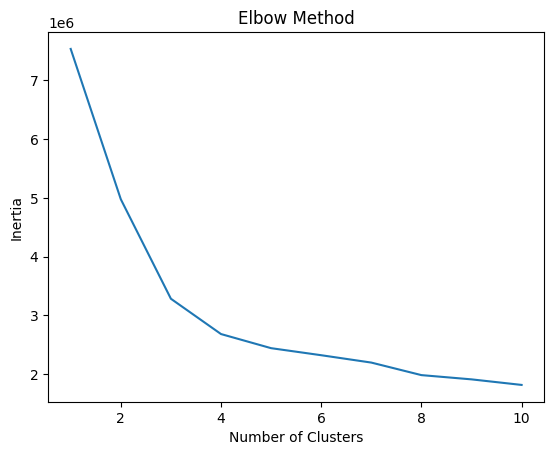

In [7]:
# Elbow Method for Choosing Number of Clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_rfe)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Fit KMeans to the Data
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_rfe)

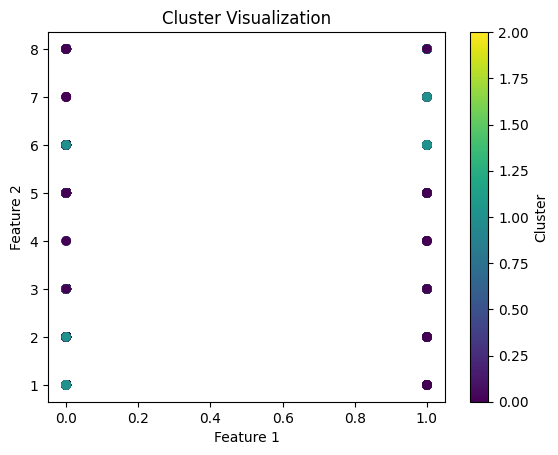

In [9]:
# Visualize the Clusters
plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
# Building Local Classifiers based on Clustering
cluster_classifiers = {}
for cluster in range(optimal_clusters):
    # Select data for current cluster
    X_cluster = X[cluster_labels == cluster]
    y_cluster = y[cluster_labels == cluster]
    
    # Train logistic regression model
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    model_cluster = LogisticRegression(max_iter=1000)
    model_cluster.fit(X_train_cluster, y_train_cluster)
    
    # Make predictions
    y_pred_cluster = model_cluster.predict(X_test_cluster)

C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Devshree Deshmukh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [11]:
# Print classification report
print(f"\nClassification Report for Cluster {cluster}:")
print(classification_report(y_test_cluster, y_pred_cluster))


Classification Report for Cluster 2:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1218
           1       0.25      0.01      0.01       190

    accuracy                           0.86      1408
   macro avg       0.56      0.50      0.47      1408
weighted avg       0.78      0.86      0.80      1408



In [15]:
from imblearn.over_sampling import SMOTE

# Apply oversampling using SMOTE to get a better model
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_rfe, y)

# Split the resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_resampled = model_resampled.predict(X_test_res)

# Print accuracy report
accuracy_resampled = accuracy_score(y_test_res, y_pred_resampled)
classification_rep_resampled = classification_report(y_test_res, y_pred_resampled)
print("\nAccuracy Report after Oversampling with SMOTE:")
print(f"Accuracy: {accuracy_resampled}")
print(f"Classification Report:\n{classification_rep_resampled}")


Accuracy Report after Oversampling with SMOTE:
Accuracy: 0.6447707367336425
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     23315
           1       0.63      0.71      0.67     23269

    accuracy                           0.64     46584
   macro avg       0.65      0.64      0.64     46584
weighted avg       0.65      0.64      0.64     46584



In [17]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters grid excluding 'l1' penalty
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Regularization penalty
}

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Initialize logistic regression model with best parameters
best_model = LogisticRegression(**best_params, max_iter=1000)

# Train the model on the training data
best_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_resampled = best_model.predict(X_test_res)

# Print accuracy report
accuracy_resampled = accuracy_score(y_test_res, y_pred_resampled)
classification_rep_resampled = classification_report(y_test_res, y_pred_resampled)
print("\nAccuracy Report after Hyperparameter Tuning and Oversampling with SMOTE:")
print(f"Accuracy: {accuracy_resampled}")
print(f"Classification Report:\n{classification_rep_resampled}")

Best Parameters: {'C': 100, 'penalty': 'l2'}

Accuracy Report after Hyperparameter Tuning and Oversampling with SMOTE:
Accuracy: 0.644985402713378
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     23315
           1       0.63      0.71      0.67     23269

    accuracy                           0.64     46584
   macro avg       0.65      0.65      0.64     46584
weighted avg       0.65      0.64      0.64     46584

